# Heal&Go App (Bangkit 2022 Capstone Project)
### Created by : C22-PS165 Team
Deep Learning Model for Heal&Go App

## Connect to Google Drive for Import Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Preprocessing Section
This section contains:
- Import Library
- Open Dataset
- Clean Dataset
- Encode Dataset
- OverSampling Dataset
- Convert Dataset to Tensor
- Split Dataset for Training

#### Import Library & Open Dataset

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from tensorflow.keras.optimizers import Adam

# Open dataset using pandas (Path according to folder)
df = pd.read_csv("/content/drive/MyDrive/Capstone/questionnaire_dataset3.csv")
df

,Timestamp,"Dari ke-20 destinasi wisata di bawah ini, mana tempat yang pernah dikunjungi?","Berdasarkan destinasi wisata yang dipilih, dengan siapa Anda mengunjungi tempat tersebut?","Berdasarkan orang yang ikut bersama Anda ke tempat destinasi tersebut, berapa umur semua orang yang ikut dalam perjalanan Anda tersebut?","Berdasarkan destinasi wisata yang dipilih, apa aktivitas yang Anda lakukan pada saat mengunjungi tempat tersebut?","Berdasarkan destinasi wisata yang Anda pilih, adakah aktivitas olahraga yang dapat dilakukan di tempat tersebut?","Berdasarkan destinasi wisata yang Anda pilih, berapa lama Anda mengunjungi tempat tersebut?","Berdasarkan destinasi wisata yang Anda pilih, kapan Anda mengunjungi tempat tersebut?",Email Address,Email,Gender2,Gender,Price
0,5/10/2022 14:02:19,"Kawah Putih, Jawa Barat",Bersama grup pertemanan,Remaja (14-20 tahun),"Menikmati pemandangan, Mengambil foto atau selfie",Tidak ada,Kurang dari sehari,Desember-Februari,NaN,NaN,NaN,f,< 500rb
1,5/10/2022 14:03:51,"Taman Mini Indonesia Indah (TMII), Jakarta",Bersama grup pertemanan,Remaja (14-20 tahun),"Pergi ke festival/taman bermain, Jalan-jalan",Tidak ada,Kurang dari sehari,Juni-Agustus,NaN,NaN,NaN,f,500rb - 3jt
2,5/10/2022 14:03:57,"Taman Safari Bogor, Jawa Barat",Bersama grup pertemanan,Dewasa (21-45 tahun),Mengunjungi museum/kebun binatang/tempat berse...,Tidak ada,Kurang dari sehari,Juni-Agustus,NaN,NaN,NaN,f,500rb - 3jt
3,5/10/2022 14:11:57,"Dunia Fantasi (Dufan), Jakarta",Bersama grup pertemanan,"Anak-anak (0-13 tahun), Dewasa (21-45 tahun)",Mengunjungi museum/kebun binatang/tempat berse...,Tidak ada,Kurang dari sehari,Maret-Mei,NaN,NaN,NaN,f,500rb - 3jt
4,5/10/2022 14:11:58,"Pantai Pangandaran, Jawa Barat",Bersama keluarga dengan anak,"Anak-anak (0-13 tahun), Remaja (14-20 tahun), ...",Mengunjungi museum/kebun binatang/tempat berse...,"Olahraga ringan (Berenang, Hiking, Golf)",1 minggu,Desember-Februari,NaN,NaN,NaN,m,500rb - 3jt
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,5/28/2022 15:10:30,"Malioboro, Yogyakarta",Bersama pasangan,Dewasa (21-45 tahun),"Mengambil foto atau selfie, Jalan-jalan, Berbe...",Tidak ada,Kurang dari sehari,Maret-Mei,NaN,NaN,f,f,< 500rb
1031,5/28/2022 15:13:04,"Malioboro, Yogyakarta",Bersama pasangan,Dewasa (21-45 tahun),"Mengambil foto atau selfie, Jalan-jalan",Tidak ada,Kurang dari sehari,Maret-Mei,NaN,NaN,f,f,< 500rb
1032,5/28/2022 15:14:59,"Malioboro, Yogyakarta",Bersama keluarga dengan anak,"Anak-anak (0-13 tahun), Remaja (14-20 tahun), ...","Mengambil foto atau selfie, Jalan-jalan",Tidak ada,Kurang dari sehari,Maret-Mei,NaN,NaN,m,m,< 500rb
1033,5/28/2022 15:20:50,"Malioboro, Yogyakarta",Bersama keluarga dengan anak,"Anak-anak (0-13 tahun), Dewasa (21-45 tahun)","Mengambil foto atau selfie, Jalan-jalan, Berbe...",Tidak ada,Kurang dari sehari,Maret-Mei,NaN,NaN,m,m,< 500rb


#### Clean Dataset

In [3]:
#Function : Rename Column's Name
def change_head(column_head, df):
  df.rename(columns = column_head, inplace = True)
  return df

rename = {"Dari ke-20 destinasi wisata di bawah ini, mana tempat yang pernah dikunjungi?" : "Destination",
          "Berdasarkan destinasi wisata yang dipilih, dengan siapa Anda mengunjungi tempat tersebut?" : "Member",
          "Berdasarkan orang yang ikut bersama Anda ke tempat destinasi tersebut, berapa umur semua orang yang ikut dalam perjalanan Anda tersebut?" : "Member's Age",
          "Berdasarkan destinasi wisata yang dipilih, apa aktivitas yang Anda lakukan pada saat mengunjungi tempat tersebut?" : "Activity",
          "Berdasarkan destinasi wisata yang Anda pilih, adakah aktivitas olahraga yang dapat dilakukan di tempat tersebut?" : "Sport Activity",
          "Berdasarkan destinasi wisata yang Anda pilih, berapa lama Anda mengunjungi tempat tersebut?" : "Number of Days",
          "Berdasarkan destinasi wisata yang Anda pilih, kapan Anda mengunjungi tempat tersebut?" : "Time of Year"}

# Change the dataset column's name
df = change_head(rename, df)

In [4]:
#Function : Drop Dataset Column
def drop_column(to_drop, df):
  df.drop(to_drop, inplace = True, axis = 1)
  return df

# Drop some unneeded columns
drop = ["Timestamp", "Email Address", "Email", "Gender2"]
df = drop_column(drop, df)

In [5]:
# Choose 41 destinations with the most value and delete the rest
destination = df['Destination'].value_counts()[:41].index.tolist()
df = df[df["Destination"].isin(destination)]

#Reindex the data for encode
df.reset_index(inplace = True)

In [6]:
destination.sort()
destination

['Air Terjun Madakaripura, Jawa Timur',
 'Cukul Sunrise Point, Jawa Barat',
 'Curug Cikaso, Jawa Barat',
 'Curug Cipamingkis, Jawa Barat',
 'Curug Cipendok, Jawa Tengah',
 'Danau Toba, Sumatera Utara',
 'Dunia Fantasi (Dufan), Jakarta',
 'Grafika Cikole, Jawa Barat',
 'Green Canyon Pangandaran, Jawa Barat',
 'Gunung Bromo, Jawa Timur',
 'Kawah Putih, Jawa Barat',
 'Kepulauan Seribu, Jakarta',
 'Labuan Bajo, NTT',
 'Lombok, NTB',
 'Malioboro, Yogyakarta',
 'Nusa Penida, Bali',
 'Pantai Air Manis, Sumatera Barat',
 'Pantai Balekambang, Jawa Timur',
 'Pantai Gesing, Yogyakarta',
 'Pantai Kasap, Jawa Timur',
 'Pantai Klingking, Bali',
 'Pantai Pandawa, Bali',
 'Pantai Pangandaran, Jawa Barat',
 'Pantai Santolo, Jawa Barat',
 'Pantai Sawarna, Banten',
 'Pantai Srakung, Yogyakarta',
 'Pantai Surumanis, Jawa Tengah',
 'Pantai Tampora, Jawa Timur',
 'Pantai Tanjung Lesung, Banten ',
 'Pulau Padar, NTT',
 'Raja Ampat, Papua Barat',
 'Rancabali Glamping, Jawa Barat',
 'Simpang Lima Gumul, Jawa T

In [8]:
#Function : Split Column's Value 
def split_column_value(column, df):
  df[column] = df[column].apply(lambda x: set(str(x).split(", ")))
  return df[column]

#Split some column for multilabel encode
df["Activity"] = split_column_value("Activity", df)
df["Member's Age"] = split_column_value("Member's Age", df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

#### Encode Dataset

In [9]:
#Function : Multilabel Encode Dataset's Column
def multilabel_encode(column, df):
  multilabel = MultiLabelBinarizer()
  col = multilabel.fit_transform(df[column])
  print(multilabel.classes_) 

  dataframe = pd.DataFrame(col, columns = multilabel.classes_)
  return dataframe

#Multilabel encode some column
df2 = multilabel_encode("Activity", df)
df3 = multilabel_encode("Member's Age", df)

#Concat all of dataframe
new_df = pd.concat([df, df2, df3], axis=1, join = 'inner')

['Berbelanja' 'Berpetualang di tempat tersebut' 'Fotografi' 'Jalan-jalan'
 'Mengambil foto atau selfie'
 'Mengunjungi museum/kebun binatang/tempat bersejarah'
 'Menikmati pemandangan' 'Pergi ke festival/taman bermain']
['Anak-anak (0-13 tahun)' 'Dewasa (21-45 tahun)'
 'Lansia (lebih dari 65 tahun)' 'Remaja (14-20 tahun)'
 'Usia Pertengahan (46-64)']


In [10]:
df["Price"].value_counts()

500rb - 3jt    428
< 500rb        276
4jt - 7.5jt    112
> 7.5jt         73
Name: Price, dtype: int64

In [11]:
#Label encode some column
label = LabelEncoder()
cols = ["Destination", "Member", "Sport Activity", "Number of Days", "Time of Year", "Gender", "Price"]
new_df[cols] = new_df[cols].apply(label.fit_transform)

# Drop some unneeded columns
new_df = drop_column(["index", "Member's Age", "Activity"], new_df)

#Shuffle the Dataset
new_df = new_df.sample(frac = 1)


In [12]:
new_df.head(100)

,Destination,Member,Sport Activity,Number of Days,Time of Year,Gender,Price,Berbelanja,Berpetualang di tempat tersebut,Fotografi,Jalan-jalan,Mengambil foto atau selfie,Mengunjungi museum/kebun binatang/tempat bersejarah,Menikmati pemandangan,Pergi ke festival/taman bermain,Anak-anak (0-13 tahun),Dewasa (21-45 tahun),Lansia (lebih dari 65 tahun),Remaja (14-20 tahun),Usia Pertengahan (46-64)
402,14,1,1,1,1,0,2,1,0,0,1,1,0,0,0,1,1,0,1,1
645,23,1,1,3,2,1,1,0,0,0,0,1,0,1,0,1,1,0,0,0
156,9,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,1
520,34,0,0,3,0,1,3,0,1,0,0,0,0,0,0,0,0,0,1,0
332,35,0,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,33,0,1,3,1,1,2,0,0,0,1,1,0,1,0,0,1,0,1,0
670,26,0,0,3,3,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0
757,39,1,1,3,2,1,2,0,0,0,1,1,0,1,0,1,1,0,0,1
530,5,3,1,1,2,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0


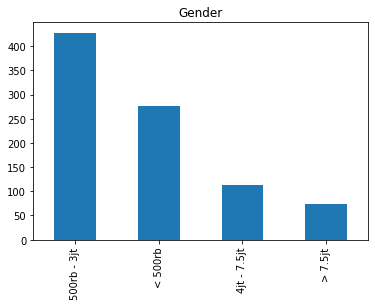

In [13]:
gend = df["Price"].value_counts()
gend.plot(kind='bar', title='Gender')

#### OverSampling Dataset

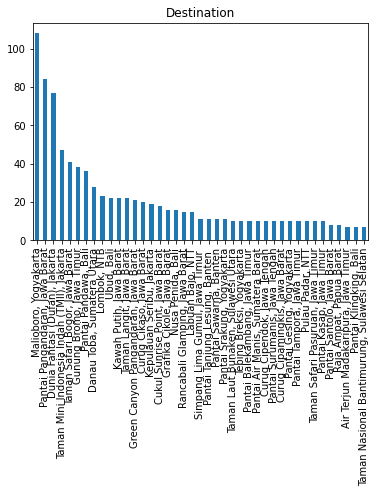

In [14]:
#Visualization of the amount of data per tourist destination
dest = df["Destination"].value_counts()
dest.plot(kind='bar', title='Destination')

In [15]:
#Separate data which is class label
y = new_df["Destination"]
x = new_df.drop(["Destination"], axis = 1)

In [16]:
from imblearn.over_sampling import RandomOverSampler

#OverSampling data with RandomOverSampler
ros = RandomOverSampler(random_state = 2)
x_ros, y_ros = ros.fit_resample(x, y)

print(x_ros.shape[0] - x.shape[0], 'new random picked points')

3539 new random picked points


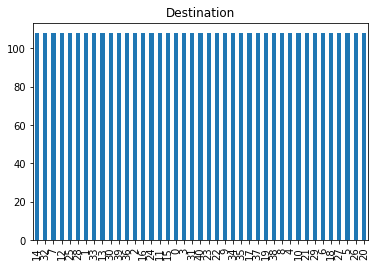

In [17]:
#Visualization of the amount of data per tourist destination after OverSampling
y_plot = y_ros.value_counts()
y_plot.plot(kind='bar', title='Destination')

In [18]:
#Enter the new data into the variable
x = x_ros
y = y_ros

In [19]:
#Shuffle data
id = tf.range(start=0, limit=tf.shape(x)[0], dtype=tf.int32)
idx = tf.random.shuffle(id)
x = tf.gather(x, idx)
y = tf.gather(y, idx)

In [20]:
from sklearn import preprocessing

scale = preprocessing.MinMaxScaler()
x = scale.fit_transform(x)
x

array([[0.25, 1.  , 0.75, ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.75, ..., 0.  , 1.  , 0.  ],
       [0.25, 0.  , 0.75, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 1.  , 0.75, ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.75, ..., 0.  , 0.  , 0.  ],
       [0.25, 1.  , 0.25, ..., 0.  , 0.  , 0.  ]])

#### Split Dataset For Training
The dataset is divided into 3 parts, that is Training Data (70%), Validation Data (20%), and Test Data (10%)

In [22]:
length = len(x)
length

4428

In [23]:
#Function : Split Data for Training
def split_data(df, train_bound, val_bound):
  train = df[:train_bound]
  validation = df[train_bound:val_bound]
  test = df[val_bound:]

  return train, validation, test

#Convert data to tensor
x = tf.convert_to_tensor(x)
y = tf.convert_to_tensor(y)

#Define data split limit
train_bound = int(0.7*length)
val_bound = int(0.9*length)

#Split data
train_x, val_x, test_x = split_data(x, train_bound, val_bound)
train_y, val_y, test_y = split_data(y, train_bound, val_bound)

In [24]:
train_x

<tf.Tensor: shape=(3099, 19), dtype=float64, numpy=
array([[0.25, 1.  , 0.75, ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.75, ..., 0.  , 1.  , 0.  ],
       [0.25, 0.  , 0.75, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.25, 1.  , 0.25, ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.75, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.75, ..., 0.  , 0.  , 0.  ]])>

## Build The Deep Learning Model

In [25]:
#Build Deep Learning model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(125, input_shape = (None, 3099, 19) ,activation='relu'),
    #tf.keras.layers.Dense(750, activation='relu'),
    #tf.keras.layers.Dense(125, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(41, activation = 'softmax')
  ])

model.compile(optimizer=Adam(learning_rate = 0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 3099, 125)   2500      
                                                                 
 dense_1 (Dense)             (None, None, 3099, 250)   31500     
                                                                 
 dense_2 (Dense)             (None, None, 3099, 250)   62750     
                                                                 
 dropout (Dropout)           (None, None, 3099, 250)   0         
                                                                 
 dense_3 (Dense)             (None, None, 3099, 41)    10291     
                                                                 
Total params: 107,041
Trainable params: 107,041
Non-trainable params: 0
_________________________________________________________________


## Train the Model

In [27]:
#Train the model
history = model.fit(train_x, train_y, epochs = 500, validation_data = (val_x, val_y))

Epoch 1/500
97/97 [==============================] - 1s 6ms/step - loss: 3.2422 - accuracy: 0.1620 - val_loss: 2.3740 - val_accuracy: 0.3510
Epoch 2/500
97/97 [==============================] - 0s 4ms/step - loss: 1.9881 - accuracy: 0.4014 - val_loss: 1.5648 - val_accuracy: 0.5102
Epoch 3/500
97/97 [==============================] - 0s 4ms/step - loss: 1.5355 - accuracy: 0.4956 - val_loss: 1.3364 - val_accuracy: 0.5711
Epoch 4/500
97/97 [==============================] - 0s 4ms/step - loss: 1.2799 - accuracy: 0.5763 - val_loss: 1.1808 - val_accuracy: 0.5937
Epoch 5/500
97/97 [==============================] - 0s 4ms/step - loss: 1.1452 - accuracy: 0.6137 - val_loss: 1.0565 - val_accuracy: 0.6377
Epoch 6/500
97/97 [==============================] - 0s 4ms/step - loss: 1.0193 - accuracy: 0.6563 - val_loss: 0.8995 - val_accuracy: 0.7144
Epoch 7/500
97/97 [==============================] - 0s 4ms/step - loss: 0.8899 - accuracy: 0.7022 - val_loss: 0.8348 - val_accuracy: 0.7144
Epoch 8/500
9

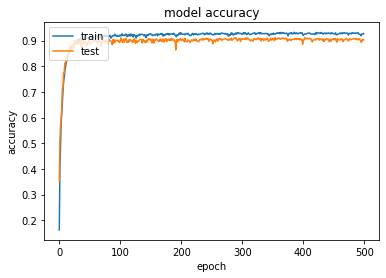

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

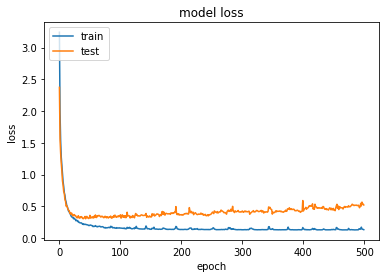

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Evaluate and Predict Destination



In [30]:
#Evaluate model with test data
loss, acc = model.evaluate(test_x, test_y)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

14/14 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8939
Restored model, accuracy: 89.39%


In [41]:
print(test_x[2])
print(test_y[2])

tf.Tensor(
[0.25       1.         0.75       0.66666667 1.         0.66666667
 0.         0.         0.         1.         1.         0.
 1.         0.         1.         1.         0.         0.
 0.        ], shape=(19,), dtype=float64)
tf.Tensor(39, shape=(), dtype=int64)


In [42]:
# x = [[Member, Sport Activity,	Number of Days,	Time of Year,	Berbelanja,	Berpetualang di tempat tersebut,	Fotografi,	
#       Jalan-jalan,	Mengambil foto atau selfie,	Mengunjungi museum/kebun binatang/tempat bersejarah,	Menikmati pemandangan,	
#       Pergi ke festival/taman bermain,	Anak-anak (0-13 tahun),	Dewasa (21-45 tahun),	Lansia (lebih dari 65 tahun),	Remaja (14-20 tahun),	
#       Usia Pertengahan (46-64)]]
# model.predict(x)

#Predict model
#t_x = [[0.75, 1., 0.75, 0.66666667, 1., 0.66666667, 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.]]
t_x = [[0.25, 1., 0.75, 0.66666667, 1., 0.66666667, 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0.]]
prediction = model.predict(t_x)

#Sort from the highest value probability and get the index
result = (-prediction).argsort()[::-1]

In [43]:
#Show the destination place if only need 1 prediction
destination_prediction_one = destination[(result[0][0])]
destination_prediction_one

'Tebing Breksi, Yogyakarta'

In [44]:
#Show the destination place if need 5 prediction
destination_prediction_five = []

for index in result[0][:5]:
  destination_prediction_five.append(destination[index])

destination_prediction_five

['Tebing Breksi, Yogyakarta',
 'Kawah Putih, Jawa Barat',
 'Pantai Tanjung Lesung, Banten ',
 'Malioboro, Yogyakarta',
 'Taman Mini Indonesia Indah (TMII), Jakarta']

In [45]:
#List of destination place
destination

['Air Terjun Madakaripura, Jawa Timur',
 'Cukul Sunrise Point, Jawa Barat',
 'Curug Cikaso, Jawa Barat',
 'Curug Cipamingkis, Jawa Barat',
 'Curug Cipendok, Jawa Tengah',
 'Danau Toba, Sumatera Utara',
 'Dunia Fantasi (Dufan), Jakarta',
 'Grafika Cikole, Jawa Barat',
 'Green Canyon Pangandaran, Jawa Barat',
 'Gunung Bromo, Jawa Timur',
 'Kawah Putih, Jawa Barat',
 'Kepulauan Seribu, Jakarta',
 'Labuan Bajo, NTT',
 'Lombok, NTB',
 'Malioboro, Yogyakarta',
 'Nusa Penida, Bali',
 'Pantai Air Manis, Sumatera Barat',
 'Pantai Balekambang, Jawa Timur',
 'Pantai Gesing, Yogyakarta',
 'Pantai Kasap, Jawa Timur',
 'Pantai Klingking, Bali',
 'Pantai Pandawa, Bali',
 'Pantai Pangandaran, Jawa Barat',
 'Pantai Santolo, Jawa Barat',
 'Pantai Sawarna, Banten',
 'Pantai Srakung, Yogyakarta',
 'Pantai Surumanis, Jawa Tengah',
 'Pantai Tampora, Jawa Timur',
 'Pantai Tanjung Lesung, Banten ',
 'Pulau Padar, NTT',
 'Raja Ampat, Papua Barat',
 'Rancabali Glamping, Jawa Barat',
 'Simpang Lima Gumul, Jawa T

### (Just for Compare Deep Learning Model's Accuracy with Machine Learning Model)

In [48]:
# importing necessary libraries
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

svm = SVC().fit(train_x, train_y)
svm_pred = svm.predict(test_x)
# model accuracy for X_test
accuracy = svm.score(test_x, test_y)

#================================================
knn = KNeighborsClassifier(n_neighbors = 7).fit(train_x, train_y)
accuracy2 = knn.score(test_x, test_y)

#================================================
dt = DecisionTreeClassifier(max_depth = 10).fit(train_x, train_y)
accuracy3 = dt.score(test_x, test_y)


In [49]:
print("ACCURACY COMPARISON OF ML ALGORITHM AND DEEP LEARNING MODEL")
print("===========================================================")
print("SVM                 : {}".format(accuracy))
print("kNN                 : {}".format(accuracy2))
print("Decision Tree       : {}".format(accuracy3))
print("Deep Learning Model : {}".format(acc))


ACCURACY COMPARISON OF ML ALGORITHM AND DEEP LEARNING MODEL
SVM                 : 0.7516930022573364
kNN                 : 0.7516930022573364
Decision Tree       : 0.7562076749435666
Deep Learning Model : 0.8939051628112793


### Save Model and Model Weight

In [32]:
#Save model's weight (Path according to folder)
model.save_weights('/content/drive/MyDrive/Capstone/model_with_genderprice/weight')

In [33]:
#Save model (Path according to folder)
model.save('/content/drive/MyDrive/Capstone/model_with_genderprice/model.h5')

In [34]:
tf.saved_model.save(
    model, '/content/drive/MyDrive/Capstone/model_with_genderprice/model'
)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Capstone/model_with_genderprice/model/assets


In [35]:
def save_array(path, array):
  np.savetxt(path, array)

save_array('/content/drive/MyDrive/Capstone/model_with_genderprice/y.txt', y)
save_array('/content/drive/MyDrive/Capstone/model_with_genderprice/x.txt', x)